In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# FutureWarning'leri kapatma
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Seaborn'un diamonds veri setini yükleme
df = sns.load_dataset("diamonds")

In [3]:
# Genel veri seti incelemesi
print(df.info())
print(df.describe())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float64 
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB
None
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean       0.797940     61.749405     57.457184   3932.799722      5.731157   
std        0.474011      1.432621      2.234491   3989.439738      1.121761   
min        0.200000     43.000000     4

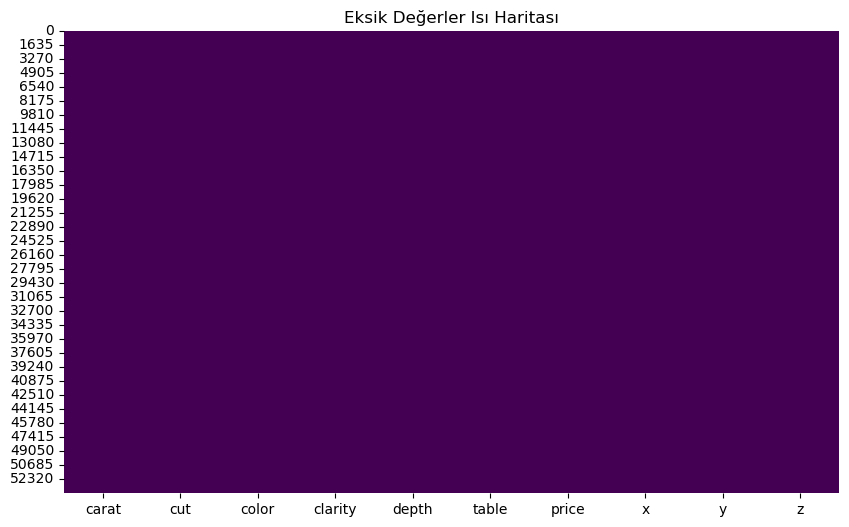

In [4]:
# Eksik veri analizi
plt.figure(figsize=(10,6))
sns.heatmap(df.isna(), cbar=False, cmap="viridis")
plt.title("Eksik Değerler Isı Haritası")
plt.show()

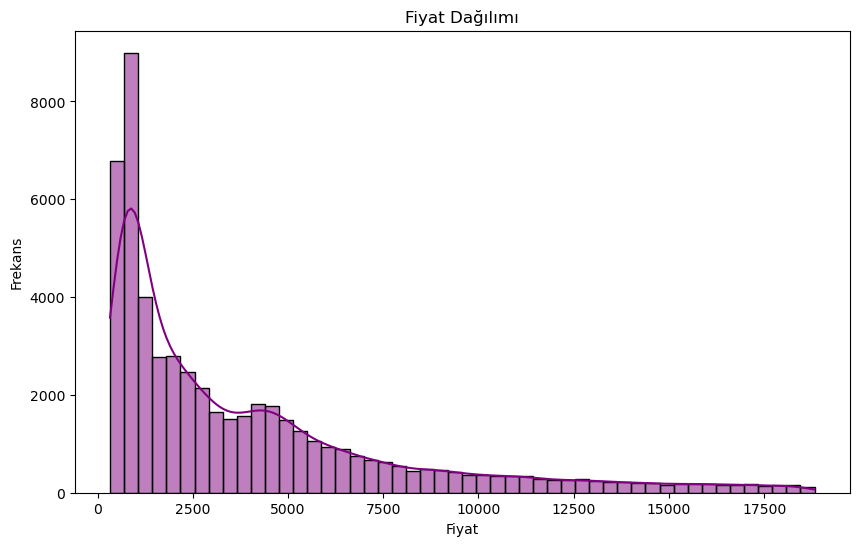

In [5]:
# Fiyat dağılımı
plt.figure(figsize=(10,6))
sns.histplot(df["price"], bins=50, kde=True, color="purple")
plt.title("Fiyat Dağılımı")
plt.xlabel("Fiyat")
plt.ylabel("Frekans")
plt.show()

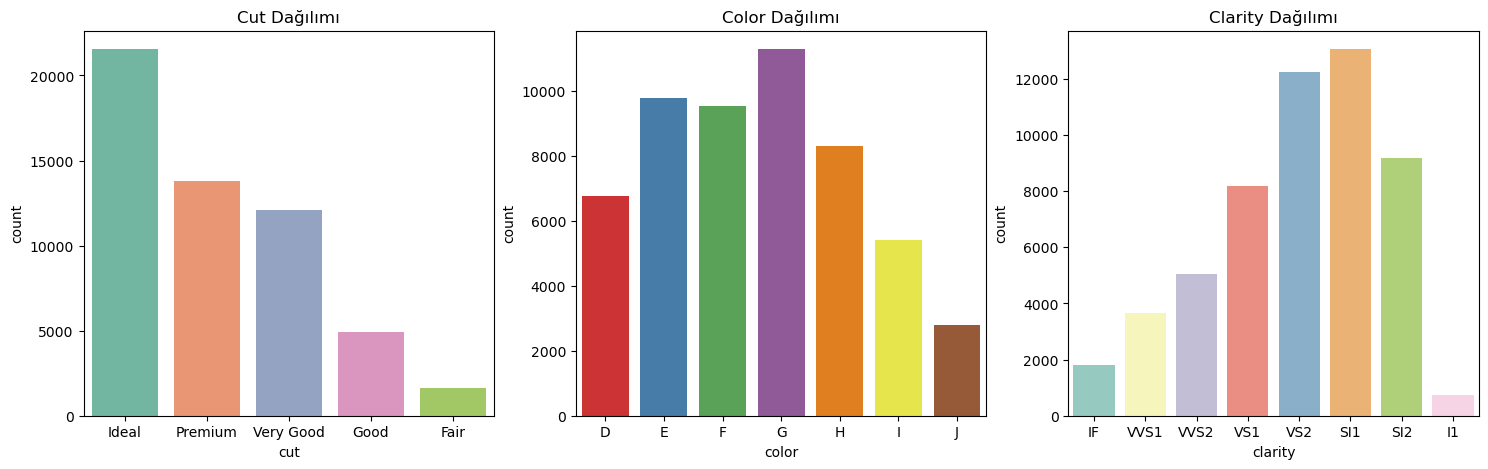

In [6]:
# Kategorik değişkenlerin dağılımı
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(data=df, x="cut", ax=axes[0], palette="Set2")
sns.countplot(data=df, x="color", ax=axes[1], palette="Set1")
sns.countplot(data=df, x="clarity", ax=axes[2], palette="Set3")

axes[0].set_title("Cut Dağılımı")
axes[1].set_title("Color Dağılımı")
axes[2].set_title("Clarity Dağılımı")

plt.show()

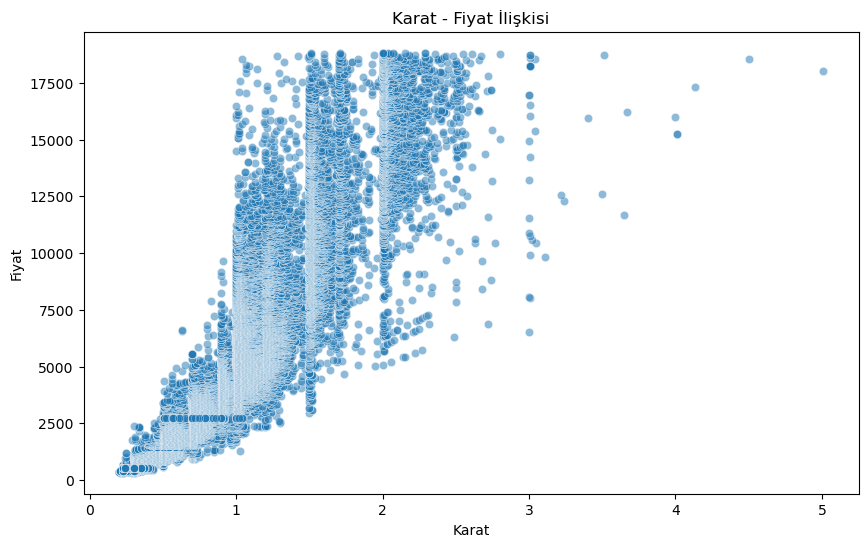

In [7]:
# Karat - Fiyat ilişkisi
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x="carat", y="price", alpha=0.5)
plt.title("Karat - Fiyat İlişkisi")
plt.xlabel("Karat")
plt.ylabel("Fiyat")
plt.show()

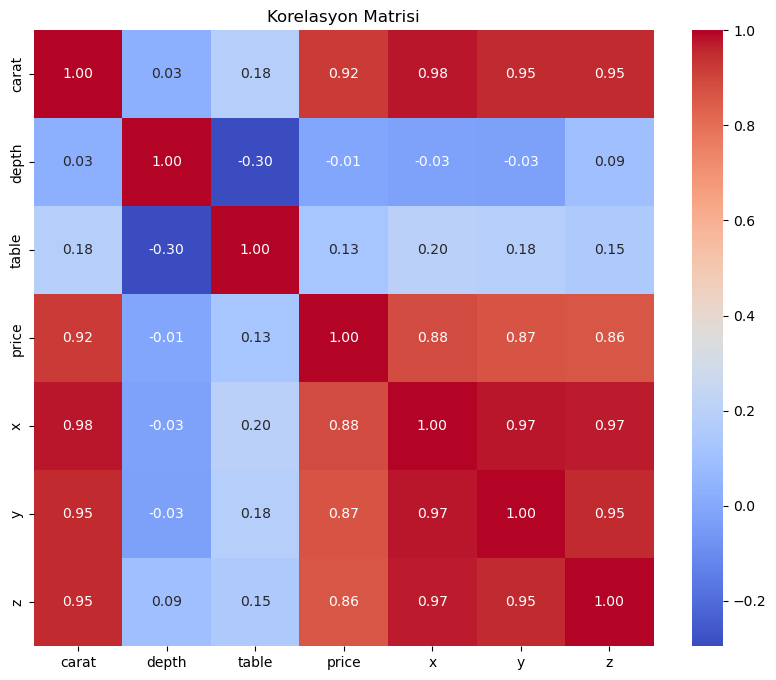

In [8]:
# Korelasyon matrisi
plt.figure(figsize=(10,8))
sns.heatmap(df.select_dtypes(include=["number"]).corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasyon Matrisi")
plt.show()

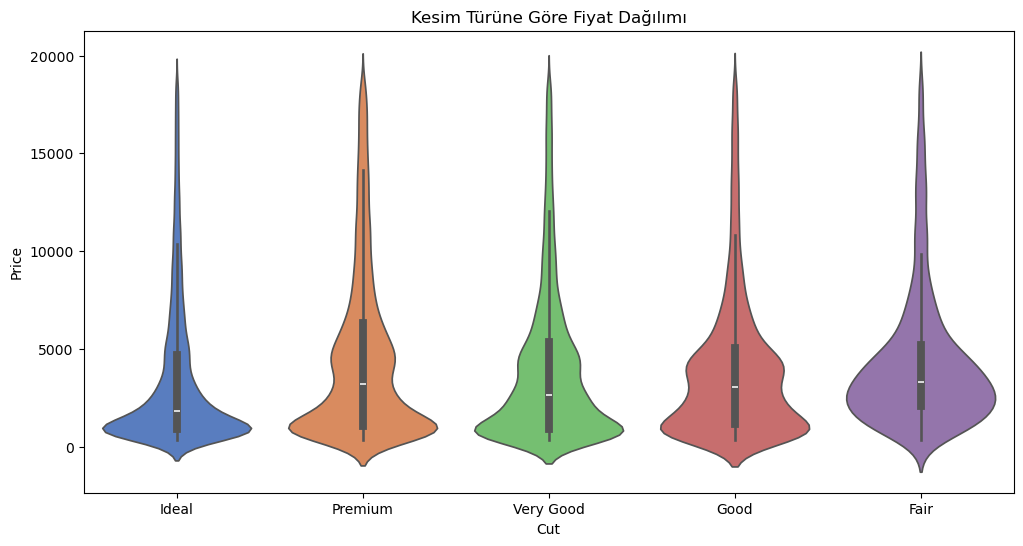

In [9]:
# Kategorik Değişkenlere Göre Fiyat Dağılımı (Violin Plot)
plt.figure(figsize=(12, 6))
sns.violinplot(data=df, x="cut", y="price", palette="muted")
plt.title("Kesim Türüne Göre Fiyat Dağılımı")
plt.xlabel("Cut")
plt.ylabel("Price")
plt.show()

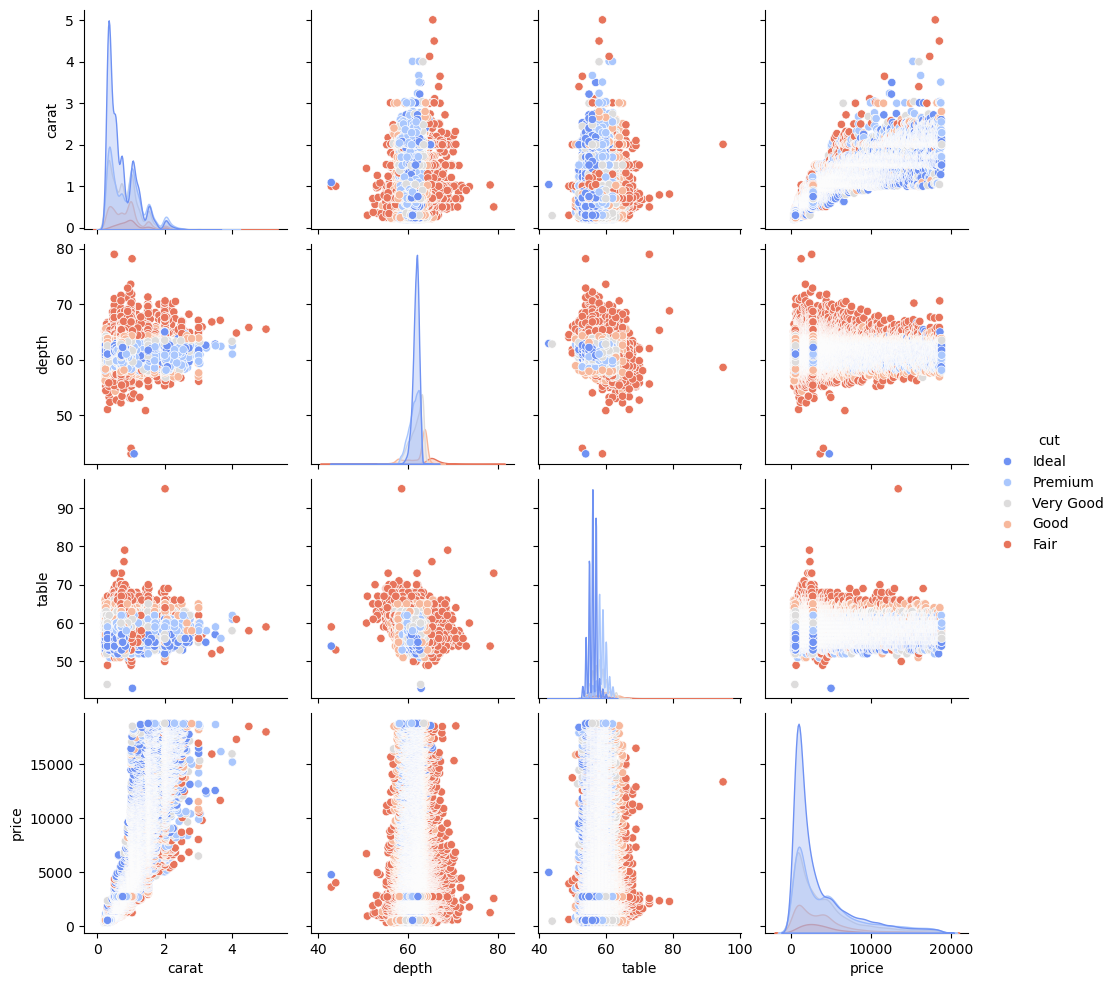

In [10]:
# Çift Değişkenli Dağılım (Pairplot)
sns.pairplot(df, vars=["carat", "depth", "table", "price"], hue="cut", palette="coolwarm")
plt.show()

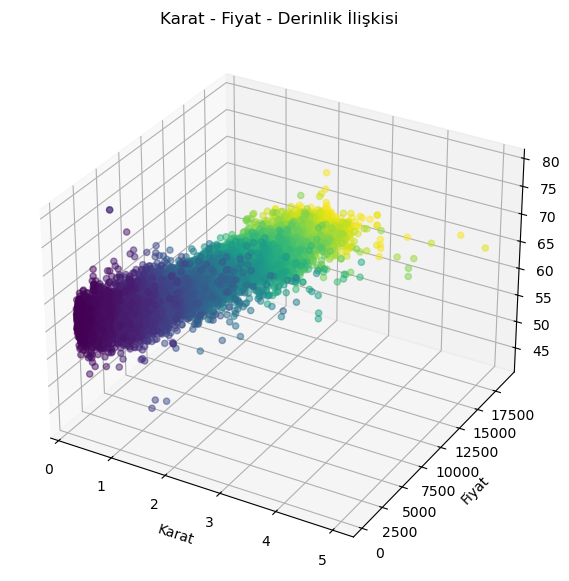

In [11]:
# 3D Dağılım Grafiği (Fiyat - Karat - Cut)
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df["carat"], df["price"], df["depth"], c=df["price"], cmap="viridis", alpha=0.5)
ax.set_xlabel("Karat")
ax.set_ylabel("Fiyat")
ax.set_zlabel("Derinlik")
plt.title("Karat - Fiyat - Derinlik İlişkisi")

plt.show()

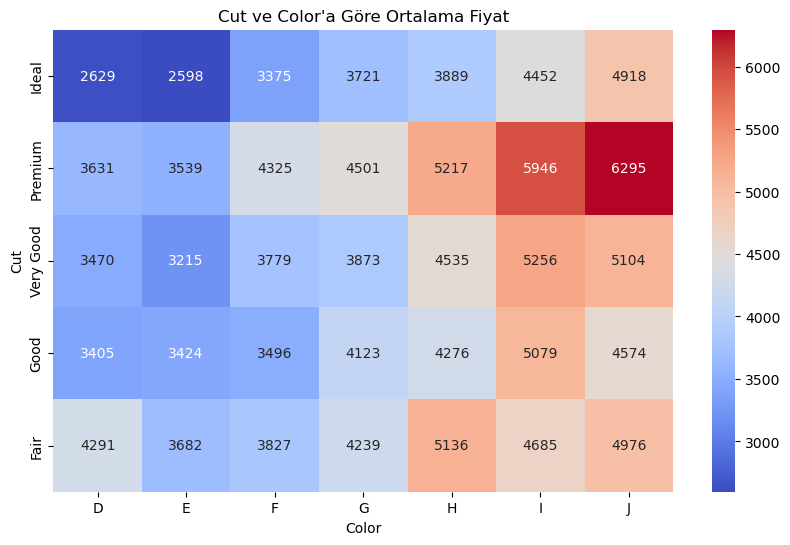

In [12]:
# Cut ve Color'a Göre Fiyat Ortalaması (Heatmap)
pivot_table = df.pivot_table(values="price", index="cut", columns="color", aggfunc="mean")

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap="coolwarm", annot=True, fmt=".0f")
plt.title("Cut ve Color'a Göre Ortalama Fiyat")
plt.xlabel("Color")
plt.ylabel("Cut")
plt.show()

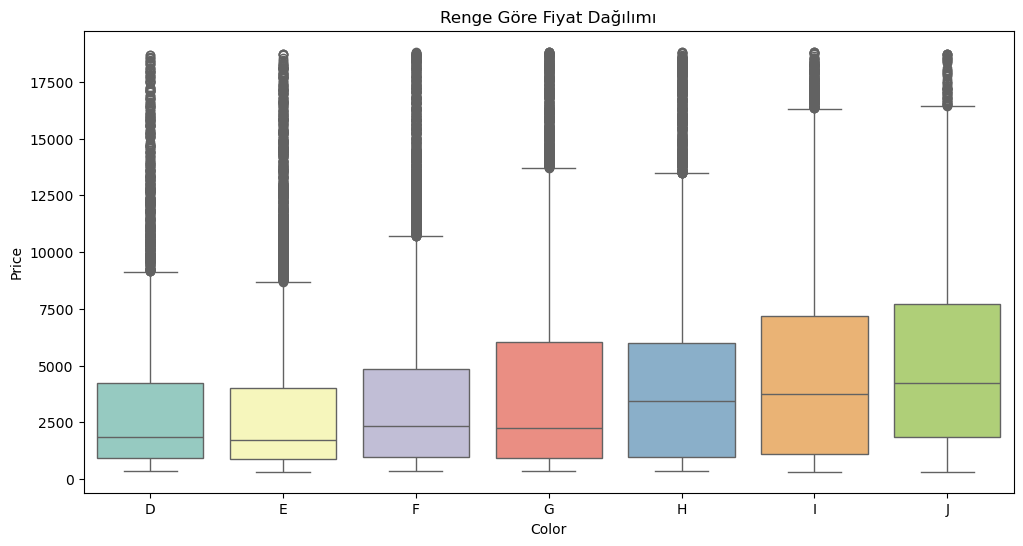

In [13]:
# Boxplot ile Kategorik Değişkenlerin Dağılımı
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="color", y="price", palette="Set3")
plt.title("Renge Göre Fiyat Dağılımı")
plt.xlabel("Color")
plt.ylabel("Price")
plt.show()